In [2]:
from scipy.integrate import solve_ivp
from scipy.stats import gamma as gamma_dist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
import sys
sys.path.append("../code")
import model
import plotting
import parametros
import parametros_POR

In [4]:
defparams = parametros.params
y1 = parametros.y0

y1['S'] = parametros_POR.y0['S']
y1['V'] = parametros_POR.y0['V']
y1['W'] = parametros_POR.y0['W']
y1['R'] = parametros_POR.y0['R']

#Different Initial Values
defparams["y0"] = list(y1.values())

#Different rates because other age groups
defparams["delta"] = parametros_POR.params["delta"]
defparams["Theta"] = parametros_POR.params["Theta"]
defparams["Theta_ICU"] = parametros_POR.params["Theta_ICU"]



params_m1 = defparams.copy()
params_m2 = defparams.copy()
params_m3 = defparams.copy()

params_m1["Rt_base"] = parametros.Rtbase['scenario3']
params_m2["Rt_base"] = parametros.Rtbase['scenario2']
params_m3["Rt_base"] = parametros.Rtbase['scenario1']

#m1 = model.Model(**params_m1)
#m2 = model.Model(**params_m2)
#m3 = model.Model(**params_m3)

print('Initials',params_m1["y0"])
print('Delta',params_m1["delta"])
print('Theta',params_m1["Theta"])
print('ThetaICU',params_m1["Theta_ICU"])

Initials [52482.0, 803700.0, 44300.0, 390.0, 39.0, 974.0, 97.0, 18.0, 98000.0, 650000.0, 5000.0, 0.0, 0.0]
Delta 0.0019083
Theta 0.000523277
ThetaICU 0.097566211


In [5]:
m1 = model.Model(**params_m1)
m2 = model.Model(**params_m2)
m3 = model.Model(**params_m3)

In [6]:
times, data = m1.run()
times, data = m2.run()
times, data = m3.run()

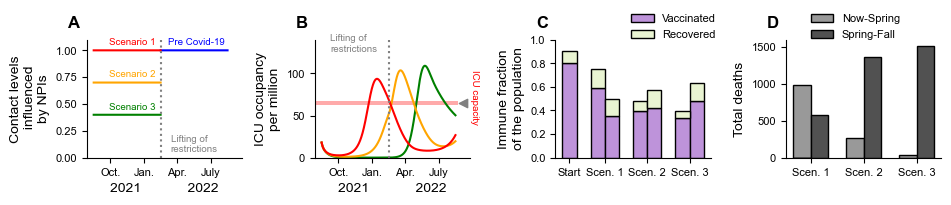

In [12]:
#mpl.rcParams['font.sans-serif'] = "Arial"
fig = plt.figure(figsize=(7*4/3, 1.9), constrained_layout=True)
grid = fig.add_gridspec(ncols=4, nrows=1, wspace=0.1)

ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1], sharex=ax1)
ax3 = fig.add_subplot(grid[2])
ax4 = fig.add_subplot(grid[3])

c = {
    'low':'green', 'mid':'orange', 'high':'red', 'free':'blue',
    'line':'gray', 'ICUcap':'#FFAAAA',
}
c3 = {'vacc':'#be93da', 'recov':'#e9f4d2'}
c4 = {'start':'#d7d7d7', 'spring':'#999999', 'fall':'#515151'}
tmp = [c['low'],c['mid'],c['high']]
offset = 1


ax1.plot(m1.times[1800:], np.ones(1800), color=c['free'])
for i in range(3):
    ax1.plot(m1.times[:1800], parametros.Rtbase[f'scenario{i+1}']/parametros.params['Rt_free']*np.ones(len(m1.times[:1800])),
            color=tmp[2-i])
    
    
for i,m in enumerate([m1,m2,m3]):
    ax2.plot(m.times, m.chopped_data()[:,7], color=tmp[i])
    
    ax3.bar(offset+(3-i)*1.5-0.25, m.chopped_data()[1800-1,1]/1e6, 0.5,  
            align='center', color=c3['vacc'], edgecolor='black' , zorder=-1)
    ax3.bar(offset+(3-i)*1.5+0.25, m.chopped_data()[3600-1,1]/1e6, 0.5, 
            align='center', color=c3['vacc'], edgecolor='black',  zorder=-1)
    ax3.bar(offset+(3-i)*1.5-0.25, m.chopped_data()[1800-1,8]/1e6, 0.5, 
            align='center', color=c3['recov'], edgecolor='black' , zorder=-1, bottom=m.chopped_data()[1800-1,1]/1e6)
    ax3.bar(offset+(3-i)*1.5+0.25, m.chopped_data()[3600-1,8]/1e6, 0.5, 
            align='center', color=c3['recov'], edgecolor='black',  zorder=-1, bottom=m.chopped_data()[3600-1,1]/1e6)
    
    ax4.bar((3-i)*1.5-0.25,m.chopped_data()[1800-1,11], 0.5, align='center', color=c4['spring'], 
            edgecolor='black',  zorder=-1)
    ax4.bar((3-i)*1.5+0.25,m.chopped_data()[3600-1,11]-m.chopped_data()[1800-1,11], 0.5, 
            align='center', color=c4['fall'], edgecolor='black',  zorder=-1)
    
ax3.bar(offset, m1.chopped_data()[0,1]/1e6, align='edge', width=0.5, label='Vaccinated',
        color=c3['vacc'], edgecolor='black')
ax3.bar(offset, m1.chopped_data()[0,8]/1e6, align='edge',  width=0.5, label='Recovered',
        color=c3['recov'], edgecolor='black', bottom=m.chopped_data()[0,1]/1e6)

#Just for the colors:
ax4.bar(offset,0,align='edge', width=0.5, color=c4['spring'], edgecolor='black', label='Now-Spring')
ax4.bar(offset,0,align='edge', width=0.5, color=c4['fall'], edgecolor='black', label='Spring-Fall')



for ax in [ax1,ax2]:
    ax.axvline(180, ls=':', color=c['line'])
    ax.set_xlabel('2021            2022')


ax1.set_ylim(0,1.1)
ax2.set_ylim(0,140)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1600)

ax1.set_ylabel("Contact levels\n influenced\nby NPIs")
ax2.set_ylabel("ICU occupancy\nper million")
ax3.set_ylabel("Immune fraction\nof the population")
ax4.set_ylabel("Total deaths")

#Panel 1
ax1.text(40,parametros.Rtbase['scenario3']/5+0.05,'Scenario 3', size=7, color=c['low'])
ax1.text(40,parametros.Rtbase['scenario2']/5+0.05,'Scenario 2', size=7, color=c['mid'])
ax1.text(40,parametros.Rtbase['scenario1']/5+0.05,'Scenario 1', size=7, color=c['high'])
ax1.text(200,parametros.Rtbase['scenario1']/5+0.05,'Pre Covid-19', size=7, color=c['free'])

#Lifting of restrictions
ax1.text(0.54,0.05,'Lifting of\nrestrictions', size=7, color=c['line'], transform=ax1.transAxes)
ax2.text(0.1,0.9,'Lifting of\nrestrictions', size=7, color=c['line'], transform=ax2.transAxes)


ax1.text(-.12,1.1,'A', size=12, weight='bold', color='black', transform=ax1.transAxes)
ax2.text(-.12,1.1,'B', size=12, weight='bold', color='black', transform=ax2.transAxes)
ax3.text(-.12,1.1,'C', size=12, weight='bold', color='black', transform=ax3.transAxes)
ax4.text(-.12,1.1,'D', size=12, weight='bold', color='black', transform=ax4.transAxes)

#ax2.axhline(65, ls=':', color=c['line'])
ax2.axhspan(65-2,65+2, xmax=0.92, facecolor=c['ICUcap'], edgecolor=None, zorder=-1)
ax2.text(1.0,0.3,'ICU capacity', size=7, color='red', rotation=-90, transform=ax2.transAxes)
ax2.scatter(380,65, marker="<", color='grey')


ax1.set_xticks([45, 135, 45+2*90, 45+3*90])
ax1.set_xticklabels(['Oct.','Jan.','Apr.','July'])


ax3_x = [offset+0.25,offset+1.5,offset+3,offset+4.5]
ax3labels=['Start','Scen. 1', 'Scen. 2', 'Scen. 3']
ax3.set_xticks(ax3_x)
ax3.set_xticklabels(ax3labels)

ax4_x = [1.5,3,4.5]
ax4labels=['Scen. 1', 'Scen. 2', 'Scen. 3']
ax4.set_xticks(ax4_x)
ax4.set_xticklabels(ax4labels)

ax3.legend(bbox_to_anchor=(1, 1.2, 0.1, 0.1), ncol=1, frameon=False)
ax4.legend(bbox_to_anchor=(0.7, 1.2, 0.1, 0.1), ncol=1, frameon=False)

plt.show()
fig.savefig("./figures/portugal_fig1.pdf")